EmplType              float64
Certification           int64
InjuryMech            float64
High_impact_InjSev    float64
Amnesia_verb          float64
                       ...   
HospHead              float64
HospHeadPosCT           int64
Intub24Head           float64
Neurosurgery          float64
PosIntFinal           float64
Length: 124, dtype: object
EmplType              Int64
Certification         Int64
InjuryMech            Int64
High_impact_InjSev    Int64
Amnesia_verb          Int64
                      ...  
HospHead              Int64
HospHeadPosCT         Int64
Intub24Head           Int64
Neurosurgery          Int64
PosIntFinal           Int64
Length: 124, dtype: object
  Removing 47193 NaN values from 26 columns


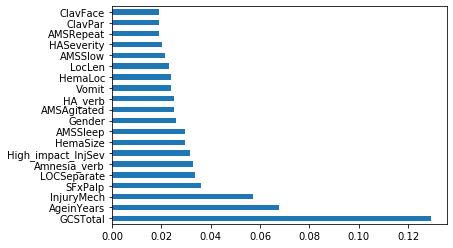

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%run FeatureSelection.ipynb

In [ ]:
# Check balance of class variable

sns.countplot(x=pecarn_df["PosIntFinal"])
pecarn_df.groupby(['PosIntFinal']).size()

In [ ]:
# Remove Biased in dataset

# Shuffle the Dataset.
shuffled_df = pecarn_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['PosIntFinal'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['PosIntFinal'] == 0].sample(n=763,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('PosIntFinal', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [ ]:
pecarn_df = normalized_df